# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Solution
For this assignment I want to analyze the growth between resident population and the reported traditions of different congregations adherent in Michigan.

# Research question
How the religion traditions change among Michigan residents over the period of 1980-2010

# Datasets

U.S. Census Bureau, Historical Population Change Data (1910-2020) : 
[population-change-data-table](https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html)<br>

Association of Statisticians of American Religious Bodies (ASARB) State Membership Report: [Michigan](https://web.archive.org/web/20210228085740/https://www.thearda.com/rcms2010/r/s/26/rcms2010_26_state_adh_1980.asp)

# Data processing

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

The format that Bureau excel files use is tricky, so I modified them a little bit dividing the census data by year in different excel sheets. 

In [ ]:
xls=pd.ExcelFile("/content/population-change-data-table-modif.xlsx")
sheet_to_df_map={}
for sheet_name in xls.sheet_names:
    sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
    sheet_to_df_map[sheet_name]['Area'][0]='Area'
    cols=list(sheet_to_df_map[sheet_name].loc[0])
    sheet_to_df_map[sheet_name]=sheet_to_df_map[sheet_name].set_axis(cols, axis=1, inplace=False)
    sheet_to_df_map[sheet_name]=sheet_to_df_map[sheet_name].drop([0]).reset_index(drop=True)
    sheet_to_df_map[sheet_name]=sheet_to_df_map[sheet_name][22:23]

In [ ]:
df_census=pd.DataFrame(columns=['year','pop'])
df_census.loc[0]=[1980]+[sheet_to_df_map['1950_1980'].loc[22]['Resident Population 1980 Census']]
df_census.loc[1]=[1990]+[sheet_to_df_map['1990_2020'].loc[22]['Resident Population 1990 Census']]
df_census.loc[2]=[2000]+[sheet_to_df_map['1990_2020'].loc[22]['Resident Population 2000 Census']]
df_census.loc[3]=[2010]+[sheet_to_df_map['1990_2020'].loc[22]['Resident Population 2010 Census']]
df_census

,year,pop
0,1980,9262078
1,1990,9295297
2,2000,9938444
3,2010,9883640


For the traditions report, I just linked the tables to an Excel file.

In [ ]:
xls2=pd.ExcelFile("/content/michigan_religious_traditions_2.xlsx")
df_traditions=pd.DataFrame(columns=['year','Black Protestant','Catholic','Evangelical Protestant','Mainline Protestant',
                                   'Orthodox','Other'])
sheet_to_df_map_2={}
i=0
for sheet_name in xls2.sheet_names:
    sheet_to_df_map_2[sheet_name] = xls2.parse(sheet_name)
    sheet_to_df_map_2[sheet_name] = sheet_to_df_map_2[sheet_name].drop([0]).reset_index(drop=True)
    sheet_to_df_map_2[sheet_name]['Adherents']=sheet_to_df_map_2[sheet_name]['Adherents'].replace('---',0).astype(int)
    traditions=sheet_to_df_map_2[sheet_name][['Tradition','Adherents']].groupby('Tradition').sum()
    df_traditions.loc[i]=[int(sheet_name)]+[traditions.iloc[0]['Adherents']]+[traditions.iloc[1]['Adherents']]+[traditions.iloc[2]['Adherents']]+[traditions.iloc[3]['Adherents']]+[traditions.iloc[4]['Adherents']]+[traditions.iloc[5]['Adherents']]
    i=i+1

In [ ]:
df_traditions

,year,Black Protestant,Catholic,Evangelical Protestant,Mainline Protestant,Orthodox,Other
0,2010,214114,1717296,1277144,653898,47533,255358
1,2000,0,2019926,1065468,783541,47519,241680
2,1990,47183,2338608,1276394,882128,7380,134857
3,1980,46205,2043483,803864,1007369,7776,44219


# Visualization

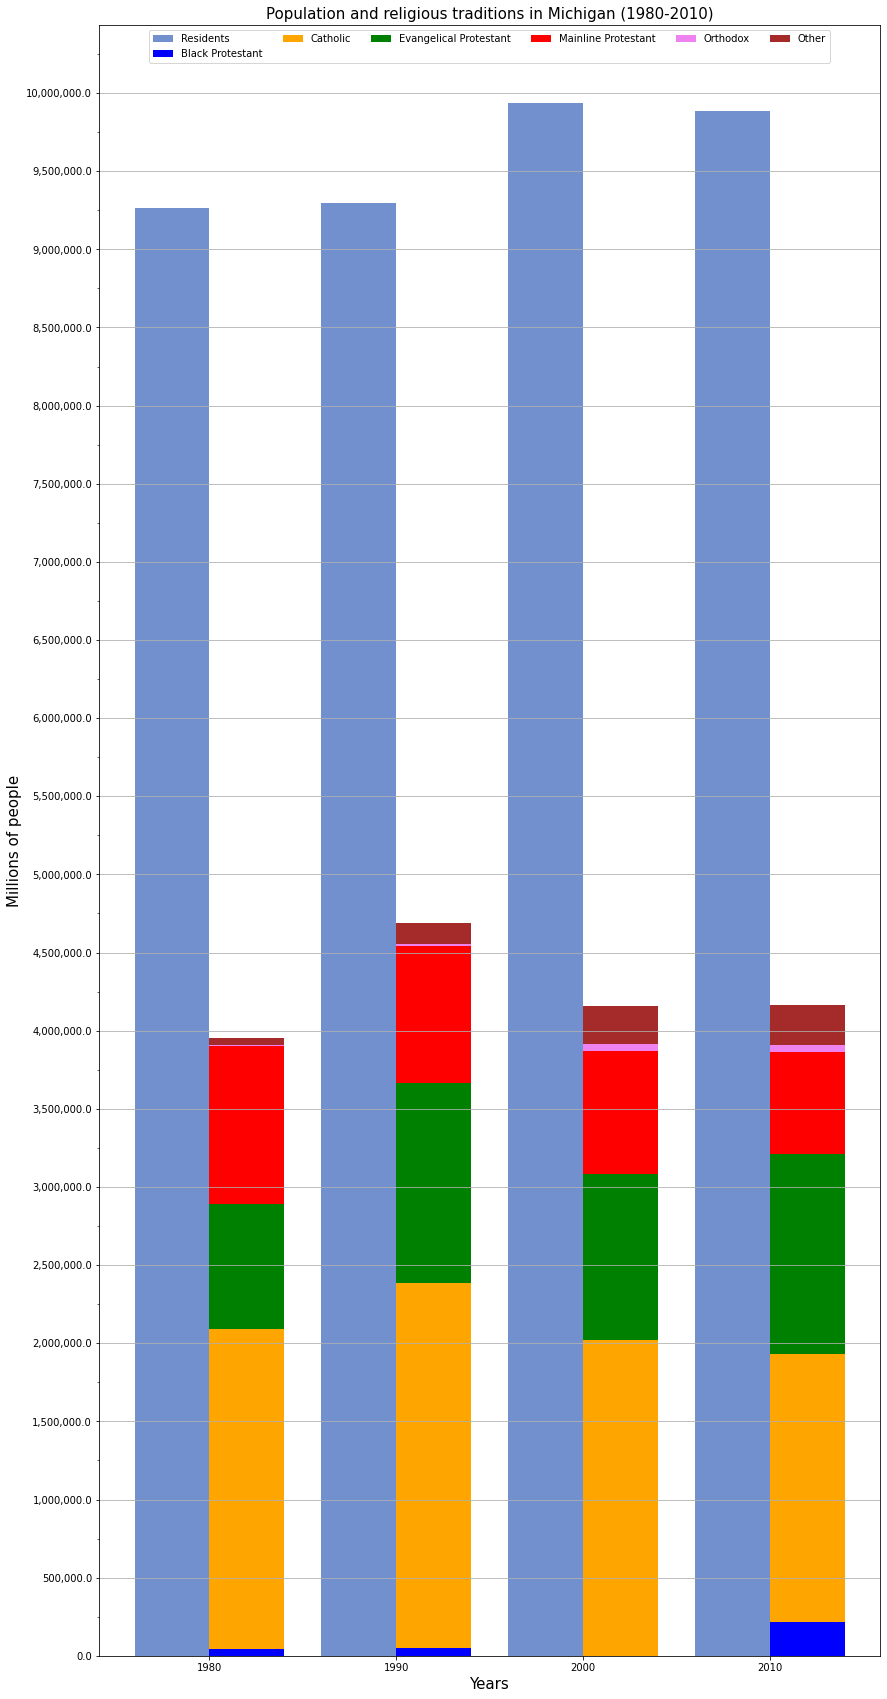

In [ ]:
width=4
fig,ax=plt.subplots(figsize=(14,30))
ax.bar(df_census['year']-width/2,df_census['pop'],width,color='#728FCE',label='Residents')

i=3
while(i>=0):
    if i==3:
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Black Protestant'][i],width,color='blue',label='Black Protestant')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Catholic'][i],width,bottom=df_traditions['Black Protestant'][i],color='orange',label='Catholic')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Evangelical Protestant'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i],color='green',label='Evangelical Protestant')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Mainline Protestant'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i],color='red',label='Mainline Protestant')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Orthodox'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i]+df_traditions['Mainline Protestant'][i],color='violet',label='Orthodox')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Other'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i]+df_traditions['Mainline Protestant'][i]+df_traditions['Orthodox'][i],color='brown',label='Other')
    else:
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Black Protestant'][i],width,color='blue')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Catholic'][i],width,bottom=df_traditions['Black Protestant'][i],color='orange')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Evangelical Protestant'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i],color='green',)
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Mainline Protestant'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i],color='red')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Orthodox'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i]+df_traditions['Mainline Protestant'][i],color='violet')
        ax.bar(df_traditions['year'].loc[i]+width/2,df_traditions['Other'][i],width,bottom=df_traditions['Black Protestant'][i]+df_traditions['Catholic'][i]+df_traditions['Evangelical Protestant'][i]+df_traditions['Mainline Protestant'][i]+df_traditions['Orthodox'][i],color='brown')
    i=i-1
plt.legend(ncol=6,loc='upper center')
plt.grid(axis='y')
plt.ticklabel_format(useOffset=False, style='plain')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(250000))
_=ax.set_xticks([1980,1990,2000,2010])
_=ax.set_xticklabels(['1980','1990','2000','2010'])
_=ax.set_xlabel('Years',size=15)
_=ax.set_ylabel('Millions of people',size=15)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
_=ax.set_title('Population and religious traditions in Michigan (1980-2010)', size=15)

# Conclusion

This visualization seeks to answer the question about how the religion traditions changed in Michigan over  years, U.S. census doesn't ask questions about citizens  religion, so this chart will give an approximate outlook of the topic. Two websites were used to search for data, for Michigans resident population I used the [United States Census Bureau](https://www.census.gov/en.html) and for the traditions report, the [ARDA](https://www.thearda.com) website provided a great source of surveys and datasets related to  religion. It's necessary to highlight that this data is provided by different congregations in Michigan and not all the congregations report its adherents every year. The 4-years resident population data was plotted as a barplot and the traditions as a stacked bar plot with differents colors for each tradition.

Comparing the population bar plot and their religious traditions, the plot shows that not all the population was covered by the reports, so there is a certainty of just forty percent of the residents. Only in the year two thousand these reports reached the fivety percent of population, in respect to traditions it appears that Michigan residents are mainly catholic, this is constant between the years nineteen eighty and two thousand, but in two thousand ten despite catholics still being the majority its evident an increase of other beliefs like black protestant, evangelical protestant and the category containing other beliefs with smaller followings.